# **Prediction using Supervised ML(Simple Linear Regression)**:

### -***Krithika Jagannath***

### **The required Libraries are**:

In [5]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

### **Importing the dataset**:

In [6]:
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Data imported successfully")

s_data.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### **Data Plotting**:

#### Plotting the given data to see if any linear relationship exists between the number of hours studies by the student and their corresponding score achieved

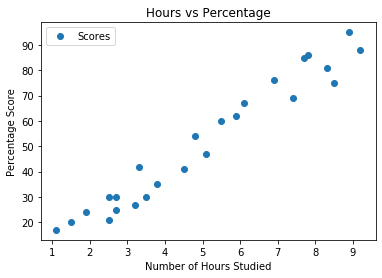

In [7]:
s_data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Number of Hours Studied')  
plt.ylabel('Percentage Score')  
plt.legend(loc=0)
plt.show()

**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score. Hence we go ahead with the linear regression model for prediction.**

### **Data Preparation:**

Preparing the data for model training

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [8]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [9]:
# Splitting the data into training and test set.
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

### **Training the Algorithm and Fitting the model**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [10]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


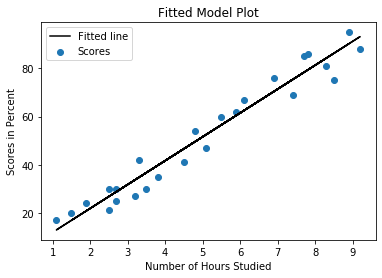

In [11]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y,label="Scores")
plt.plot(X, line,label="Fitted line",c="black");
plt.title("Fitted Model Plot")
plt.xlabel("Number of Hours Studied")
plt.ylabel("Scores in Percent")
plt.legend(loc=0)
plt.show()

From the above model it is clear that the model is giving a proper fit with linear regression

### **Making Predictions using the trained Model**
Now that we have trained our algorithm, it's time to make some predictions.

In [12]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


### **Actual v/s Predicted**:

In [13]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
print(df) 

   Actual  Predicted
0      20  16.884145
1      27  33.732261
2      69  75.357018
3      30  26.794801
4      62  60.491033


From the above dataframe it is clearly visible that the predicted scores are somewhat similar to the actual scores of the student.

In [14]:
# You can also test with your own data
val=pd.Series(9.25)
pred_val=regressor.predict(val.values.reshape(1,-1))


print("Predicted Score of a student when the student studies for 9.25 hours is = {0}".format(pred_val[0]))

Predicted Score of a student when the student studies for 9.25 hours is = 93.69173248737538


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.Here, we have chosen the mean Absolute error.

In [17]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Adjusted R Square:', 
      metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Adjusted R Square: 0.9454906892105356
